In [37]:
#|default_exp app

In [3]:
from fastai.vision.all import *
import gradio as gr

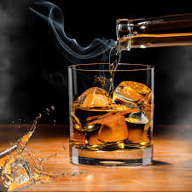

In [7]:
im = PILImage.create('download.jpeg')
im.thumbnail((192, 192))
im

In [31]:
#|export
learner = load_learner('is_supra.pkl')

In [11]:
learner.predict(im)

('not_a_supra', tensor(0), tensor([0.6847, 0.3153]))

In [32]:
#|export
labels = learner.dls.vocab
def detect(image):
    predict, predict_idx, probs = learner.predict(image)
    return dict(zip(labels, map(float, probs)))

In [18]:
detect(im)

{'not_a_supra': 0.6847192645072937, 'supra': 0.3152807652950287}

In [33]:
#|export
examples = ['supra.png', 'download.jpeg']
interface = gr.Interface(fn=detect, inputs=gr.Image(type='pil'), outputs=gr.Label(), examples=examples)
interface.launch(inline=False)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [40]:
import nbdev
nbdev.export.nb_export('02_hw_test_app.ipynb', 'is_supra_app')
print('Export successful')

Export successful
